In [29]:
#Imported Necessery Librarys

import pandas as pd
import numpy as np
import seaborn as sns
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [30]:
sentiment = pipeline("sentiment-analysis")
results = sentiment(["Today is a beautiful day!",
                     "This restaurant is disgusting"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [31]:
results

[{'label': 'POSITIVE', 'score': 0.9998838901519775},
 {'label': 'NEGATIVE', 'score': 0.9992007613182068}]

In [32]:
sentiment_1 = pipeline("sentiment-analysis", model = "xlnet-base-cased")
result = sentiment_1(["Today is a beautiful day!",
                      "This restaurant is disgusting"])

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [34]:
result

[{'label': 'LABEL_1', 'score': 0.5983728170394897},
 {'label': 'LABEL_1', 'score': 0.631516695022583}]

### Descover

In [2]:
df = pd.read_csv("Dataset/Womens Clothing E-Commerce Reviews.csv")

### EDA

In [35]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,2
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2


In [36]:
df.shape

(450, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               450 non-null    int64 
 1   Clothing ID              450 non-null    int64 
 2   Age                      450 non-null    int64 
 3   Title                    374 non-null    object
 4   Review Text              438 non-null    object
 5   Rating                   450 non-null    int64 
 6   Recommended IND          450 non-null    int64 
 7   Positive Feedback Count  450 non-null    int64 
 8   Division Name            450 non-null    object
 9   Department Name          450 non-null    object
 10  Class Name               450 non-null    object
 11  sentiment                450 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 42.3+ KB


In [6]:
df.isna().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                      76
Review Text                12
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name               0
Department Name             0
Class Name                  0
dtype: int64

In [7]:
Department_Name = df['Department Name']
Department_Name.value_counts()

Tops        229
Dresses     100
Bottoms      72
Intimate     30
Jackets      17
Trend         2
Name: Department Name, dtype: int64

In [38]:
df.Rating.value_counts()

3    167
4     75
2     75
1     75
5     58
Name: Rating, dtype: int64

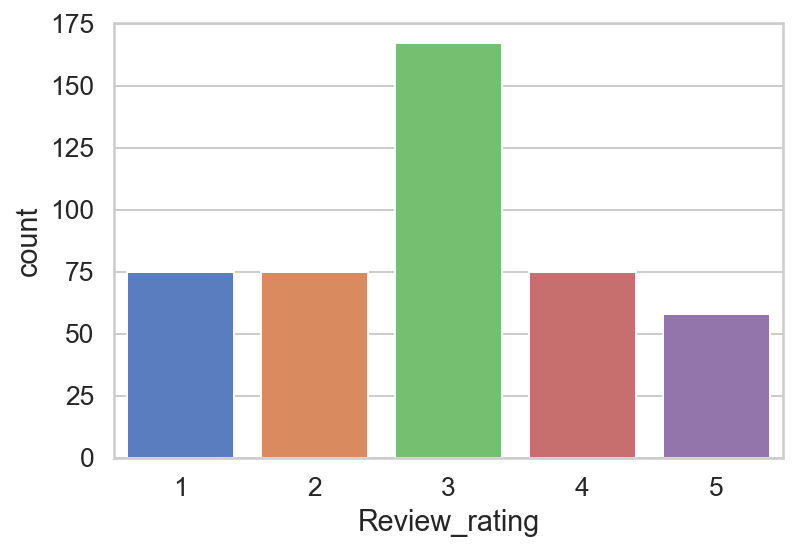

In [39]:
#Print the frequency of Rating
sns.countplot(df.Rating)
plt.xlabel('Review_rating');

In [10]:
##Encode 1 star and 2 star as Negative rated 0.
##Encode 3 star as neutral rated 1.
##Encode 4 star and 5 star as positive rated 2.

def to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

In [11]:
#Applying the cindition to Rating Columns and created a new sentiment Column

df['sentiment'] = df.Rating.apply(to_sentiment)

In [12]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,2
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2


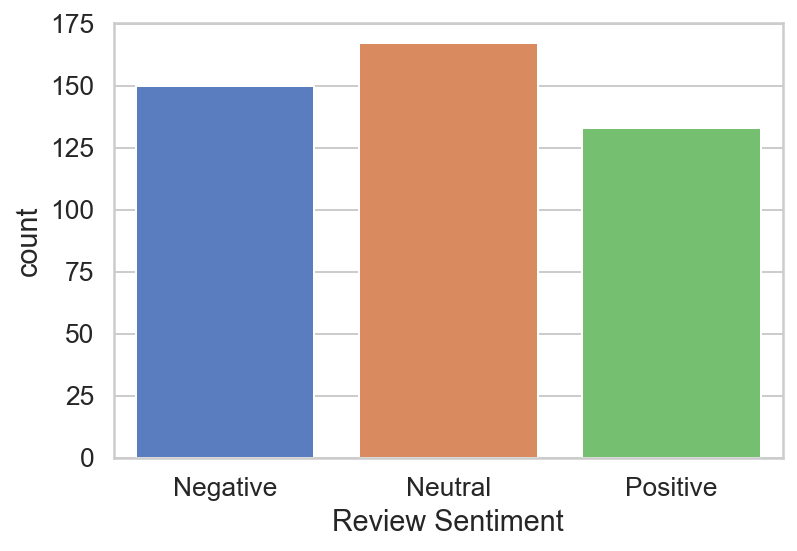

In [13]:
#plot the defined classes

cls = ['Negative', 'Neutral', 'Positive']
ax = sns.countplot(df.sentiment)
plt.xlabel('Review Sentiment')
ax.set_xticklabels(cls);

In [14]:
df.sentiment.value_counts()

1    167
0    150
2    133
Name: sentiment, dtype: int64

In [23]:
df1 = df.filter(['Review Text',"sentiment"],axis=1)
df1.head()

,Review Text,sentiment
0,Absolutely wonderful - silky and sexy and comf...,2
1,Love this dress! it's sooo pretty. i happene...,2
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",2
4,This shirt is very flattering to all due to th...,2


In [24]:
df1.isna().sum()

Review Text    12
sentiment       0
dtype: int64

In [25]:
#Droped NAN values 
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

In [26]:
df1.shape

(438, 2)

In [27]:
df1.sentiment.value_counts()

1    164
0    146
2    128
Name: sentiment, dtype: int64

In [28]:
df1.isna().sum()

Review Text    0
sentiment      0
dtype: int64

In [21]:
df1.to_csv('Dataset/E-Commerce.csv', index=False)